In [519]:
from sklearn.datasets import make_regression
import numpy as np

**``Parameters:``**
n_samples=4:The number of samples (data points) to generate. In this case, it generates 4 samples.

n_features=1:
The number of features (independent variables) in the dataset. Here, it's set to 1, meaning each sample has a single feature.

n_informative=1:
The number of informative features (features that have an actual impact on the target value). In this case, the only feature is informative.

n_targets=1:
The number of target variables. Here, it generates data for 1 target (a single output value for each input sample).

noise=80:
The standard deviation of the Gaussian noise added to the output. Adding noise makes the problem more realistic by introducing some randomness in the data. The higher the noise, the more variation you will see between the actual values and the predicted linear relationship.
random_state=2:This ensures reproducibility by setting the seed for the random number generator. If you use the same random_state value, you'll always get the same dataset.

`Output:
x: A 2D array of shape (n_samples, n_features) representing the input data (independent variable).
y: A 1D array of shape (n_samples,) representing the target values (dependent variable).`

In [710]:
x,y=make_regression(n_samples=4,n_features=1,n_informative=1,n_targets=1,noise=80,random_state=2)


In [523]:
x.shape # 4 row, 1 col

(4, 1)

In [525]:
y.shape # 4 row,1 col

(4,)

In [527]:
x

array([[-0.05626683],
       [ 1.64027081],
       [-0.41675785],
       [-2.1361961 ]])

In [529]:
y


array([ -51.74312484,  140.43888756, -103.47559951, -209.87935566])

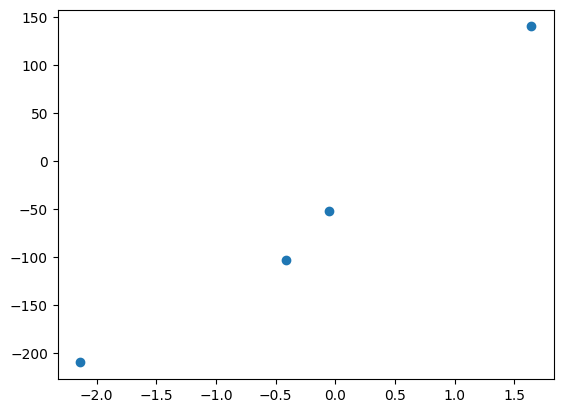

In [531]:
import matplotlib.pyplot as plt
plt.scatter(x,y)

In [533]:
# Lets apply OLS so that m and b ki value pta chl jaye
from sklearn.linear_model import LinearRegression

In [535]:
lr=LinearRegression()
lr.fit(x,y)

LinearRegression()

In [537]:
#You can use reg.get_params() to view the parameters.
lr.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [539]:
lr.coef_

array([93.15173497])

In [541]:
lr.intercept_

-33.59995559847465

In [543]:
y

array([ -51.74312484,  140.43888756, -103.47559951, -209.87935566])

In [545]:
y_pred_OLS=lr.predict(x)
y_pred_OLS

array([ -38.84130818,  119.19411603,  -72.42167215, -232.59032815])

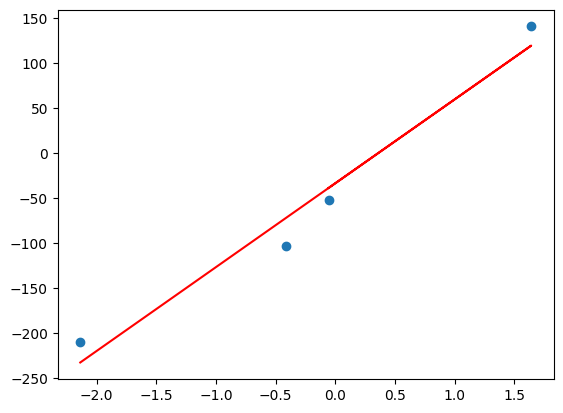

In [547]:
plt.scatter(x,y)
plt.plot(x,lr.predict(x),color='red')

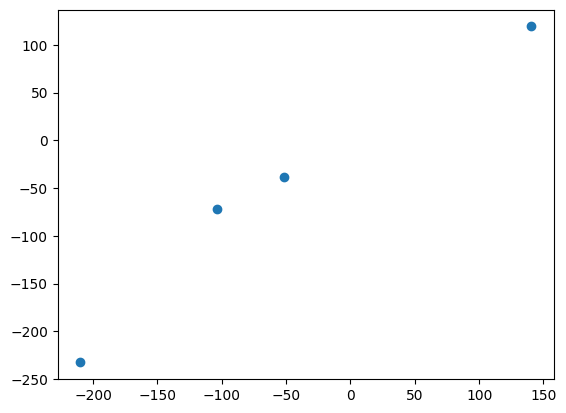

In [549]:
plt.scatter(y,y_pred_OLS)

In [551]:
# Lets apply Gradient Descent assuming slope is constant m = 93.15173497
# and let's assume the starting value for intercept b = 0 and hme b ki sahi value tk jana h
y_pred_GD = ((93.15173497 * x) + 0).reshape(4)
     

In [553]:
y_pred_GD # predicted using GD


array([  -5.24135258,  152.79407162,  -38.82171655, -198.99037255])

In [555]:
y # actual y

array([ -51.74312484,  140.43888756, -103.47559951, -209.87935566])

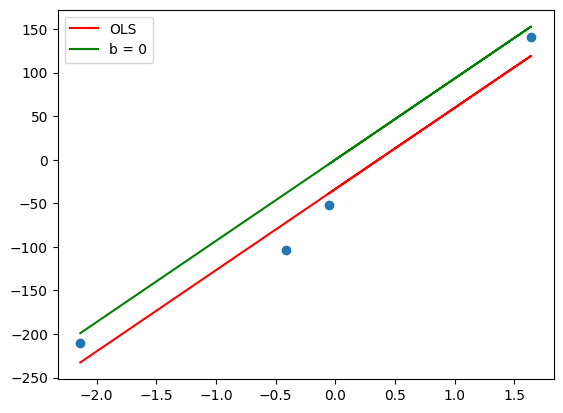

In [557]:
plt.scatter(x,y)
plt.plot(x,y_pred_OLS,color='red',label='OLS')
plt.plot(x,y_pred_GD,color='green',label='b = 0')
plt.legend()
plt.show()

In [559]:
m = 93.15173497
print('m = ',m)
b=0
print('b = ',b)

m =  93.15173497
b =  0


# **`Formula of slope ->  `**
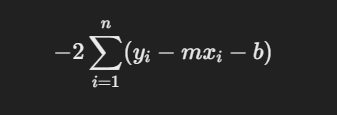


# `Why x.ravel()?`
x.ravel() flattens a multi-dimensional array into a 1D array. This ensures that the matrix multiplication between m and x works properly, as the data might sometimes be in a higher-dimensional form (like a column vector)

In [563]:
# Iteration 1
loss_slope = -2* np.sum(y-m*x.ravel()-b) # slope of the loss function
loss_slope

268.79964479318096

# `learning_rate*slope -> called step size`

In [566]:
# Let's take learning rate =0.1
lr=0.1 

step_size = lr*loss_slope
step_size

26.879964479318097

# `Formula for b`
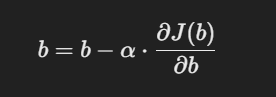

in this formula alpha = learning rate 
and other is our slope

In [570]:
# calculating the new intercept
b1 = b - step_size
b1


-26.879964479318097

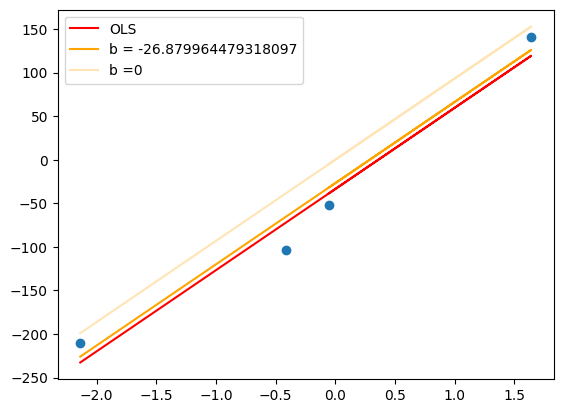

In [572]:
y_pred_GD_new_1 = ((m*x)+b1).reshape(4)
plt.scatter(x,y) # Actual Values
plt.plot(x , y_pred_OLS, color='red', label='OLS') # OLS line
plt.plot(x, y_pred_GD_new_1, color='orange', label='b = {}'.format(b1))
plt.plot(x, y_pred_GD, color='moccasin', label='b =0')
plt.legend()
plt.show()

In [574]:
# Iteration 2
loss_slope = -2* np.sum(y-m*x.ravel()-b1) # slope of the loss function
loss_slope

53.759928958636195

In [576]:
# Let's take learning rate =0.1
lr=0.1 

step_size = lr*loss_slope
step_size

5.37599289586362

In [578]:
# calculating the new intercept
b2 = b1 - step_size
b2

-32.255957375181715

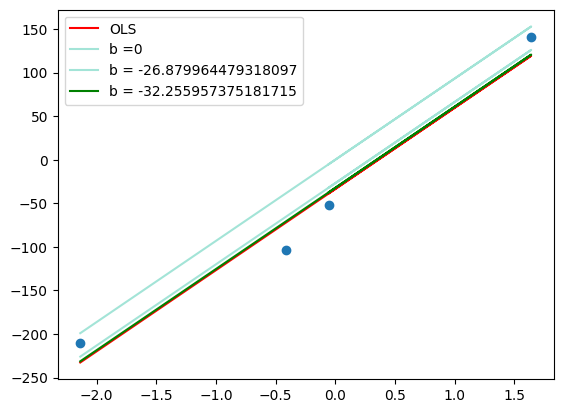

In [580]:
y_pred_GD_new_2 = ((m*x)+b2).reshape(4)
plt.scatter(x,y) # Actual Values
plt.plot(x,y_pred_OLS,color='red',label='OLS') # OLS LINE
plt.plot(x,y_pred_GD,color='#A3E4D7',label='b =0') #B=0
plt.plot(x,y_pred_GD_new_1,color='#A3E4D7',label='b = {}'.format(b1))
plt.plot(x,y_pred_GD_new_2,color='green',label='b = {}'.format(b2)) 
plt.legend()
plt.show()

In [582]:
# Iteration 3
loss_slope = -2* np.sum(y-m*x.ravel()-b2) # slope of the loss function
loss_slope


10.75198579172725

In [584]:
# Let's take learning rate =0.1
lr=0.1 

step_size = lr*loss_slope
step_size

1.075198579172725

In [586]:
# calculating the new intercept
b3 = b2 - step_size
b3

-33.33115595435444

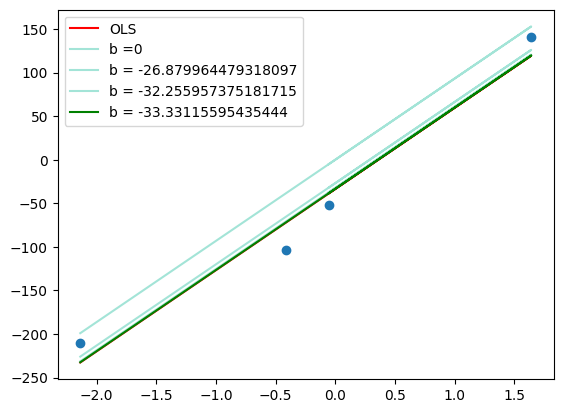

In [588]:
y_pred_GD_new_3 = ((m*x)+b3).reshape(4)
plt.scatter(x,y) # Actual Values
plt.plot(x,y_pred_OLS,color='red',label='OLS') # OLS LINE
plt.plot(x,y_pred_GD,color='#A3E4D7',label='b =0') #B=0
plt.plot(x,y_pred_GD_new_1,color='#A3E4D7',label='b = {}'.format(b1))
plt.plot(x,y_pred_GD_new_2,color='#A3E4D7',label='b = {}'.format(b2)) 
plt.plot(x,y_pred_GD_new_3,color='green',label='b = {}'.format(b3)) 
plt.legend()
plt.show()

# **` If we start at b=100 then`**

In [591]:
# Lets apply Gradient Descent assuming slope is constant m = 93.15173497
# and let's assume the starting value for intercept b = 100 and hme b ki sahi value tk jana h
y_pred_GD = ((93.15173497 * x) + 100).reshape(4)

In [593]:
y_pred_GD # predicted using GD

array([ 94.75864742, 252.79407162,  61.17828345, -98.99037255])

In [595]:
y # actual values

array([ -51.74312484,  140.43888756, -103.47559951, -209.87935566])

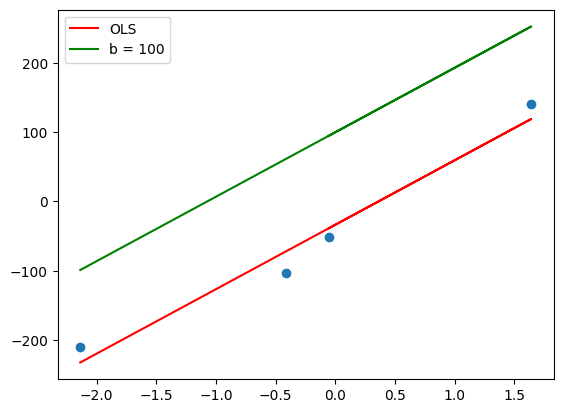

In [597]:
plt.scatter(x,y)
plt.plot(x,y_pred_OLS,color='red',label='OLS')
plt.plot(x,y_pred_GD,color='green',label='b = 100')
plt.legend()
plt.show()

In [599]:
m = 93.15173497
print('m = ',m)
b=100
print('b = ',b)

m =  93.15173497
b =  100


In [601]:
# Iteration 1
loss_slope = -2* np.sum(y-m*x.ravel()-b) # slope of the loss function
loss_slope

1068.799644793181

In [603]:
# Let's take learning rate =0.1
lr=0.1 

step_size = lr*loss_slope
step_size

106.8799644793181

In [605]:
# calculating the new intercept
b1 = b - step_size
b1


-6.8799644793181045

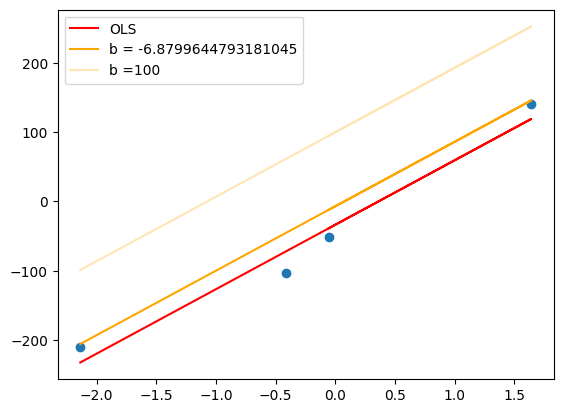

In [607]:
y_pred_GD_new_1 = ((m*x)+b1).reshape(4)
plt.scatter(x,y) # Actual Values
plt.plot(x , y_pred_OLS, color='red', label='OLS') # OLS line
plt.plot(x, y_pred_GD_new_1, color='orange', label='b = {}'.format(b1))
plt.plot(x, y_pred_GD, color='moccasin', label='b =100')
plt.legend()
plt.show()

In [609]:
# Iteration 2
loss_slope = -2* np.sum(y-m*x.ravel()-b1) # slope of the loss function
loss_slope

213.75992895863615

In [611]:
# Let's take learning rate =0.1
lr=0.1 

step_size = lr*loss_slope
step_size

21.375992895863618

In [613]:
# calculating the new intercept
b2 = b1 - step_size
b2

-28.255957375181723

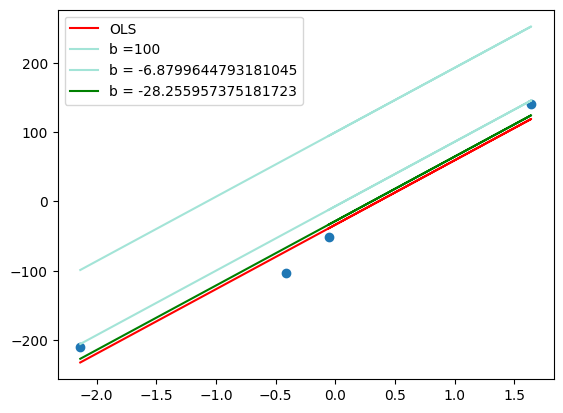

In [615]:
y_pred_GD_new_2 = ((m*x)+b2).reshape(4)
plt.scatter(x,y) # Actual Values
plt.plot(x,y_pred_OLS,color='red',label='OLS') # OLS LINE
plt.plot(x,y_pred_GD,color='#A3E4D7',label='b =100') #B=0
plt.plot(x,y_pred_GD_new_1,color='#A3E4D7',label='b = {}'.format(b1))
plt.plot(x,y_pred_GD_new_2,color='green',label='b = {}'.format(b2)) 
plt.legend()
plt.show()

In [617]:
# Iteration 3
loss_slope = -2* np.sum(y-m*x.ravel()-b2) # slope of the loss function
loss_slope


42.75198579172719

In [619]:
# Let's take learning rate =0.1
lr=0.1 

step_size = lr*loss_slope
step_size

4.275198579172719

In [621]:
# calculating the new intercept
b3 = b2 - step_size
b3

-32.53115595435444

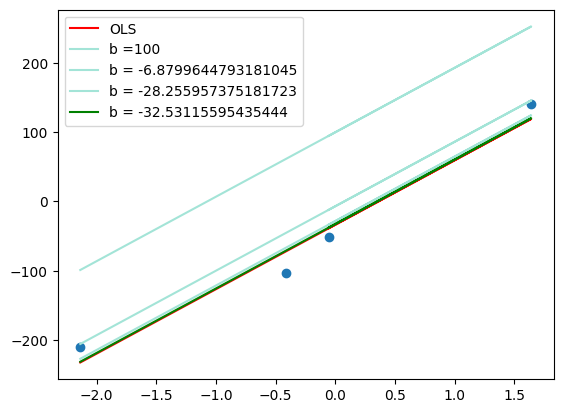

In [623]:
y_pred_GD_new_3 = ((m*x)+b3).reshape(4)
plt.scatter(x,y) # Actual Values
plt.plot(x,y_pred_OLS,color='red',label='OLS') # OLS LINE
plt.plot(x,y_pred_GD,color='#A3E4D7',label='b =100') #B=0
plt.plot(x,y_pred_GD_new_1,color='#A3E4D7',label='b = {}'.format(b1))
plt.plot(x,y_pred_GD_new_2,color='#A3E4D7',label='b = {}'.format(b2)) 
plt.plot(x,y_pred_GD_new_3,color='green',label='b = {}'.format(b3)) 
plt.legend()
plt.show()

# **`Let's do it by using Loop`**

In [697]:
b = 100
m = 93.15173497
lr = 0.1


In [705]:
epochs = 4 # epochs means iteration

-6.8799644793181045
-28.255957375181723
-32.53115595435444
-33.38619567018898


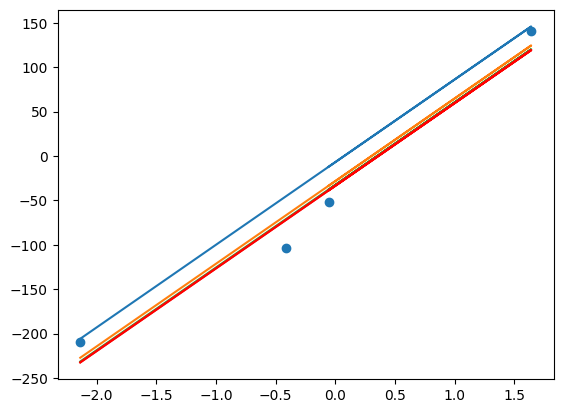

In [701]:
for i in range(epochs):
     loss_slope = -2 * np.sum(y - m*x.ravel() - b)
     b = b - (lr * loss_slope)
     print(b)

     y_pred = m * x + b

     plt.plot(x,y_pred)

plt.scatter(x,y)
plt.plot(x,y_pred_OLS,color='red',label='OLS') # OLS LINE
